In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brats-2021-task1/BraTS2021_00495.tar
/kaggle/input/brats-2021-task1/BraTS2021_Training_Data.tar
/kaggle/input/brats-2021-task1/BraTS2021_00621.tar
/kaggle/input/siim-medical-images/full_archive.npz
/kaggle/input/siim-medical-images/overview.csv
/kaggle/input/siim-medical-images/dicom_dir/ID_0015_AGE_0061_CONTRAST_1_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0019_AGE_0070_CONTRAST_1_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0063_AGE_0073_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0077_AGE_0074_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0073_AGE_0074_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0060_AGE_0080_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0051_AGE_0063_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0091_AGE_0072_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0004_AGE_0056_CONTRAST_1_CT.dcm
/kaggle/input/siim-medical-ima

## Getting the dataset

In [2]:
# Extrating the data
!tar -xvf /kaggle/input/brats-2021-task1/BraTS2021_00495.tar

./
./BraTS2021_00495_flair.nii.gz
./BraTS2021_00495_seg.nii.gz
./BraTS2021_00495_t1.nii.gz
./BraTS2021_00495_t1ce.nii.gz
./BraTS2021_00495_t2.nii.gz


### Loading medical data using SimpleITK

In [3]:
import torch
import SimpleITK as sitk
import matplotlib.pyplot as plt

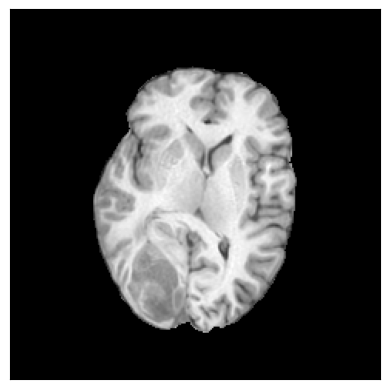

In [4]:
stk_image = sitk.ReadImage('./BraTS2021_00495_t1.nii.gz')

# slice , height, width
np_array = sitk.GetArrayFromImage(stk_image)

slice_index = np_array.shape[0] // 2
image = np_array[slice_index, :, :]

plt.imshow(image, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

### Loading medical data using NiBabel

In [5]:
import nibabel as nib

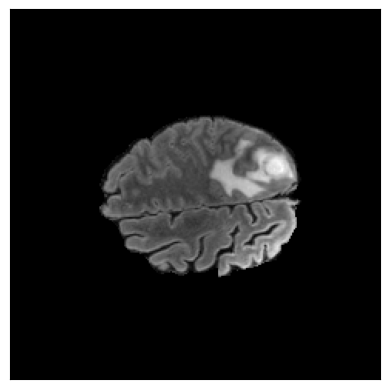

In [6]:
img = nib.load('/kaggle/working/BraTS2021_00495_flair.nii.gz')

# height, width, slice
data = img.get_fdata()

# to get the nifti image back after preprocessing
nifti_img = nib.Nifti1Image(data, img.affine)

# save the image
nib.save(nifti_img, "new_nifti_image")

slice_index = data.shape[0] // 2
image = data[:, :, slice_index]

plt.imshow(image, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 0.0
qoffset_y       : 239.0
qoffset_z       : 0.0
srow_x          : [-1. -0. -0.  0.]
srow_y          : 

In [8]:
img.affine

array([[ -1.,  -0.,  -0.,   0.],
       [ -0.,  -1.,  -0., 239.],
       [  0.,   0.,   1.,   0.],
       [  0.,   0.,   0.,   1.]])

### Using Pydicom
_You cannot use pydicom.dcmread() to read a .nii.gz file._

In [9]:
import pydicom
from PIL import Image

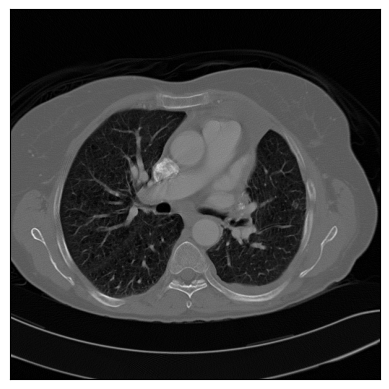

In [10]:
dcm_image = pydicom.dcmread('/kaggle/input/siim-medical-images/dicom_dir/ID_0015_AGE_0061_CONTRAST_1_CT.dcm')

patient_name = dcm_image.PatientName
dcm_array = dcm_image.pixel_array

plt.imshow(dcm_array, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
patient_name

'TCGA-17-Z043'

### Using MonaAI

In [12]:
!pip -q install monai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but you have pylibraft-cu12 25.2.0 which is incompatible.
pylibcugraph-cu12 24.12.0 requires rmm-cu12==24.12.*, but you have rmm-

In [13]:
from monai.data import ImageReader
from monai.transforms import LoadImage

2025-05-09 01:02:15.651421: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746752535.953770      14 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746752536.030518      14 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [14]:
loader = LoadImage(image_only=False)

image, meta_data = loader('./BraTS2021_00495_t1.nii.gz')

image.shape

torch.Size([240, 240, 155])

In [15]:
meta_data['extents']

array(0, dtype=int32)

### Using torchIO

In [16]:
!pip -q install torchio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 7.9 MB/s eta 0:00:00


In [17]:
import torchio as tio

# Load the image
image = tio.ScalarImage("/kaggle/working/BraTS2021_00495_flair.nii.gz")
print(f"Image shape: {image.shape}")

Image shape: (1, 240, 240, 155)


## Pre-processing with MONAI

In [18]:
from monai.transforms import ScaleIntensity, NormalizeIntensity, Spacing
import seaborn as sns

In [19]:
image = nib.load('/kaggle/working/BraTS2021_00495_flair.nii.gz')

# height, width, slice
data = image.get_fdata()
batch_dim = torch.tensor(data).unsqueeze(0)

slice_idx = data.shape[2] // 2
original_slice = data[:, :, slice_idx]

scale = ScaleIntensity(minv=0, maxv=1)
normalized_image = scale(batch_dim)
normalized_img = normalized_image.squeeze(0)

normalized_slice = normalized_img[:,:, slice_idx]

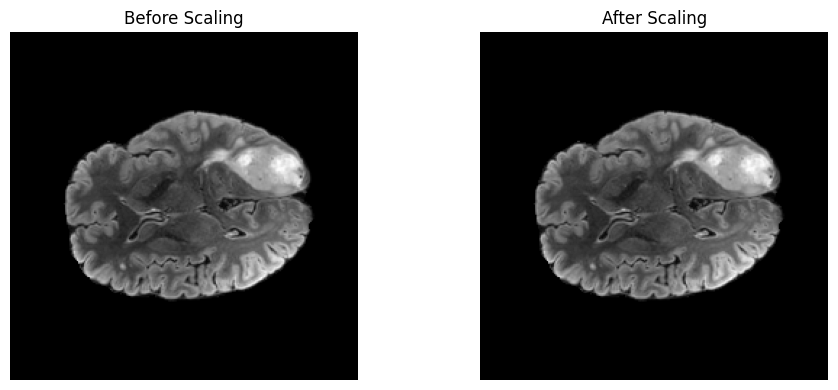

In [20]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(original_slice, cmap='gray')
plt.title('Before Scaling')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized_slice, cmap='gray')
plt.title('After Scaling')
plt.axis('off')

plt.tight_layout()
plt.show()

In [21]:
normalizer = NormalizeIntensity()
normalized_img_zscore = normalizer(batch_dim)
normalized_img = normalized_img_zscore.squeeze(0)

normalized_slice = normalized_img[:,:, slice_idx]

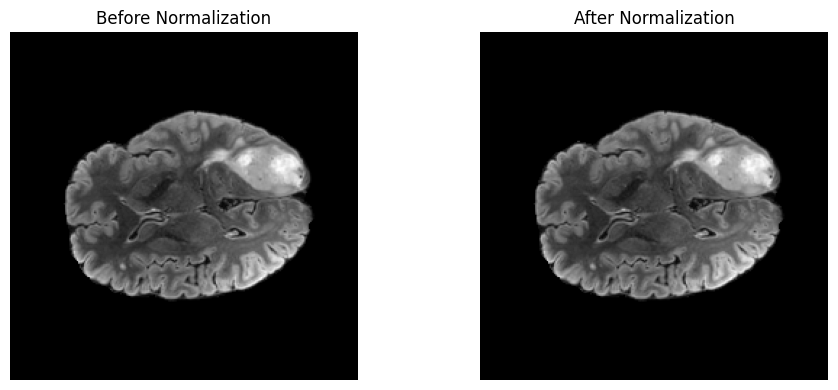

In [22]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(original_slice, cmap='gray')
plt.title('Before Normalization')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized_slice, cmap='gray')
plt.title('After Normalization')
plt.axis('off')

plt.tight_layout()
plt.show()

### Spacing

In [23]:
from monai.transforms import Spacing

# Rescale image to a new voxel spacing
spacing_transform = Spacing(pixdim=(0.85, 0.85, 0.85), mode="linear")
spacing_img = spacing_transform(batch_dim)
spacing_img = spacing_img.squeeze(0)

spacing_slice = spacing_img[:,:, slice_idx]

/usr/local/lib/python3.11/dist-packages/monai/transforms/spatial/array.py:497: UserWarning: `data_array` is not of type MetaTensor, assuming affine to be identity.
  warnings.warn("`data_array` is not of type MetaTensor, assuming affine to be identity.")


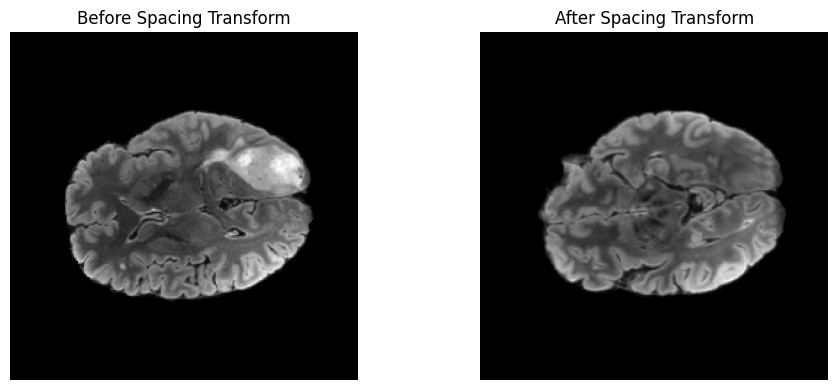

In [24]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(original_slice, cmap='gray')
plt.title('Before Spacing Transform')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(spacing_slice, cmap='gray')
plt.title('After Spacing Transform')
plt.axis('off')

plt.tight_layout()
plt.show()

### Resizing

In [25]:
from monai.transforms import Resize

resize_transform = Resize(spatial_size=(200,200,128), mode='linear',align_corners= True)
resized_img = resize_transform(batch_dim)
resized_img = resized_img.squeeze(0)

resized_slice = resized_img[:,:, slice_idx]

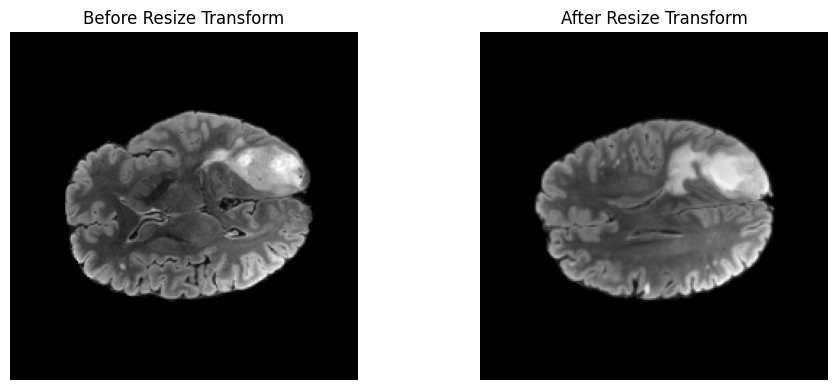

In [26]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(original_slice, cmap='gray')
plt.title('Before Resize Transform')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_slice, cmap='gray')
plt.title('After Resize Transform')
plt.axis('off')

plt.tight_layout()
plt.show()

### Combing different tranforms

In [27]:
from monai.transforms import (
    Compose,
    RandRotate,
    RandFlip,
    RandAffine,
    RandGaussianNoise,
    RandAdjustContrast,
    RandShiftIntensity,
    HistogramNormalize,
)

In [28]:
transform = Compose([
    Spacing(pixdim=(0.85, 0.85, 0.85), mode="bilinear"),        
    ScaleIntensity(minv=0.0, maxv=1.0),                       
    Resize(spatial_size=(200, 200, 128), mode='trilinear', align_corners=True)
])

In [29]:
processed_image = transform(batch_dim)

In [30]:
processed_slice = processed_image[ 0, :, :, processed_image.shape[3] // 2].detach().cpu().numpy()

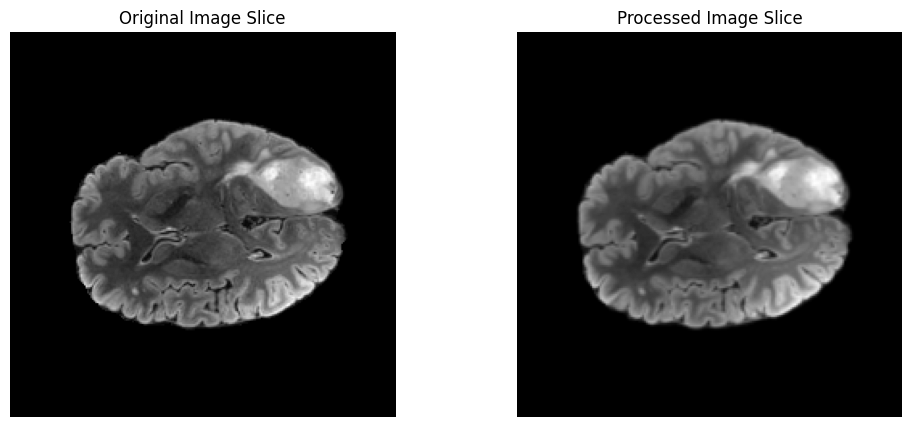

In [31]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_slice, cmap='gray')
plt.title("Original Image Slice")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(processed_slice, cmap='gray')
plt.title("Processed Image Slice")
plt.axis('off')

plt.show()